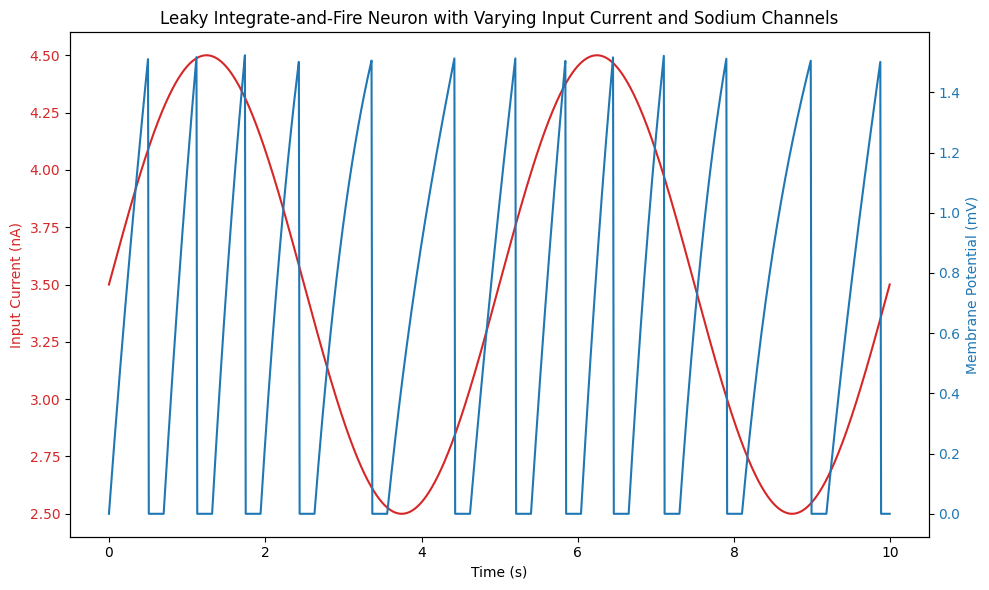

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self):
        self.membrane_potential = 0.0
        self.sodium_channels = VoltageGatedSodiumChannels()
        self.refractory_period = 0.0

    def integrate_and_fire(self, input_current):
        # Constants
        R = 1.0       # Membrane resistance (in ohms)
        C = 1.0       # Membrane capacitance (in farads)
        tau = R * C   # Time constant (in seconds)
        V_rest = 0.0  # Resting membrane potential (in volts)
        V_thresh = 1.5 # Threshold potential (in volts)
        V_reset = 0.0  # Reset potential (in volts)
        refractory_time = 0.2  # Refractory period time (in seconds)

        # Simulation parameters
        dt = 0.01      # Time step (in seconds)
        timesteps = len(input_current)
        time = np.arange(0, timesteps * dt, dt)

        # Leaky integrate-and-fire neuron simulation
        V = np.zeros_like(time)
        spikes = []

        for i in range(1, len(time)):
            if self.refractory_period > 0:
                self.refractory_period -= dt
                V[i] = V_reset
            else:
                dV = (V_rest - V[i - 1] + R * input_current[i-1]) / tau * dt  # Leaky integration with input current
                V[i] = V[i - 1] + dV

                # Check for voltage-gated sodium channel opening
                if V[i] >= V_thresh:
                    self.sodium_channels.open()
                    self.generate_action_potential()
                    self.sodium_channels.close()

                    # Set refractory period
                    self.refractory_period = refractory_time

        return time, V, spikes

    def generate_action_potential(self):
        return
class VoltageGatedSodiumChannels:
    def __init__(self):
        self.open_state = False

    def open(self):
        self.open_state = True

    def close(self):
        self.open_state = False

# Varying input current over time
input_current = np.sin(np.linspace(0, 4*np.pi, 1000)) + 2.5 + 1

# Create neuron instance
neuron = Neuron()

# Simulate leaky integrate-and-fire neuron with varying input
time, membrane_potential, _ = neuron.integrate_and_fire(input_current)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Input Current (nA)', color=color)
ax1.plot(time, input_current, color=color, label='Input Current')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Membrane Potential (mV)', color=color)  # we already handled the x-label with ax1
ax2.plot(time, membrane_potential, color=color, label='Membrane Potential')
ax2.tick_params(axis='y', labelcolor=color)



plt.title('Leaky Integrate-and-Fire Neuron with Varying Input Current and Sodium Channels')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


